In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sklearn.neighbors import KernelDensity

### Exercise 1
Calculating probabilities using kernel density estimation for a 1D box kernel.

In [2]:
ex1_data = np.array([1, 2, 5, 6, 12, 15, 16, 16, 22, 22, 22, 23])
h_ex1 = 1.5
N_ex1 = len(ex1_data)

class BoxKernel:
    def __init__(self, data, h):
        self.data = data
        self.h = h
        self.kernel = self._get_kernel_func()

    def _get_kernel_func(self):
        tot_width = 2 * self.h
        height = 1 / tot_width
        u = sy.Symbol("u", real=True)
        kernel = sy.Piecewise((height, sy.Abs(u) <= 1), (0, sy.Abs(u) > 1))
        kernel_func = sy.lambdify(u, kernel)
        return kernel_func

    def __call__(self, u):
        return self.kernel(u)

In [3]:
box_kern_ex1 = BoxKernel(ex1_data, h_ex1)
x1_ex1 = 6
x2_ex1 = 10.1
x3_ex1 = 20.499
x4_ex1 = 20.501
u1_ex1 = (x1_ex1 - ex1_data) / h_ex1
u2_ex1 = (x2_ex1 - ex1_data) / h_ex1
u3_ex1 = (x3_ex1 - ex1_data) / h_ex1
u4_ex1 = (x4_ex1 - ex1_data) / h_ex1

p1_ex1 = 1 / N_ex1 * np.sum(box_kern_ex1(u1_ex1))
p2_ex1 = 1 / N_ex1 * np.sum(box_kern_ex1(u2_ex1))
p3_ex1 = 1 / N_ex1 * np.sum(box_kern_ex1(u3_ex1))
p4_ex1 = 1 / N_ex1 * np.sum(box_kern_ex1(u4_ex1))

In [4]:
print(f"Probabilities\n{p1_ex1}\n{p2_ex1}\n{p3_ex1}\n{p4_ex1}")

Probabilities
0.0555555555555555
0.0
0.0
0.08333333333333323


### Exercise 2
Redoing exercise 1 but with a Gaussian kernel

In [5]:
def gauss_kernel(x, sigma, data):
    return (
        1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-np.abs(x - data)**2 / (2 * sigma**2))
    )

sig_ex2 = 3

u1_ex2 = (x1_ex1 - ex1_data) / h_ex1
u2_ex2 = (x2_ex1 - ex1_data) / h_ex1
u3_ex2 = (x3_ex1 - ex1_data) / h_ex1
u4_ex2 = (x4_ex1 - ex1_data) / h_ex1

p1_ex2 = 1 / N_ex1 * np.sum(gauss_kernel(u1_ex2, sig_ex2, ex1_data))
p2_ex2 = 1 / N_ex1 * np.sum(gauss_kernel(u2_ex2, sig_ex2, ex1_data))
p3_ex2 = 1 / N_ex1 * np.sum(gauss_kernel(u3_ex2, sig_ex2, ex1_data))
p4_ex2 = 1 / N_ex1 * np.sum(gauss_kernel(u4_ex2, sig_ex2, ex1_data))

In [6]:
print(f"Probabilities\n{p1_ex2}\n{p2_ex2}\n{p3_ex2}\n{p4_ex2}")

Probabilities
0.024404852733912564
0.024231190967626527
0.008771908717119836
0.00876833997025619


In [7]:
lower_ex2 = -10
upper_ex2 = 35
N_lin_ex2 = 10_000
xlin_ex2 = np.linspace(lower_ex2, upper_ex2, N_lin_ex2)
kde_ex2 = 1 / N_ex1 * np.sum(gauss_kernel(xlin_ex2.reshape(-1, 1), sig_ex2, ex1_data), axis=1)

Text(0, 0.5, '$p(x)$')

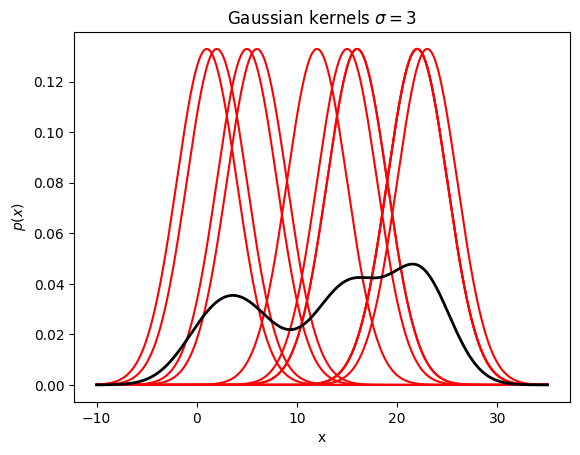

In [8]:
plt.plot(xlin_ex2, gauss_kernel(xlin_ex2.reshape(-1, 1), sig_ex2, ex1_data), label="Individual kernel contributions", color="red")
plt.plot(xlin_ex2, kde_ex2, label="KDE", color="black", lw=2)
plt.title(r"Gaussian kernels $\sigma=3$")
plt.xlabel("x")
plt.ylabel(r"$p(x)$")

In [9]:
kde_ex2_skl = KernelDensity(kernel="gaussian", bandwidth=sig_ex2).fit(ex1_data.reshape(-1, 1))

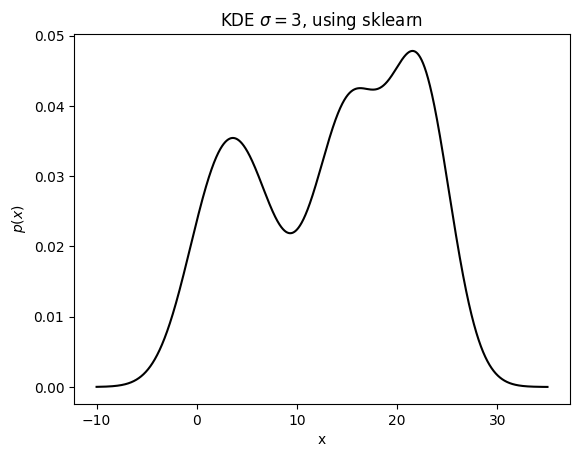

In [10]:
plt.title(r"KDE $\sigma=3$, using sklearn")
plt.xlabel("x")
plt.ylabel(r"$p(x)$")
plt.plot(xlin_ex2, np.exp(kde_ex2_skl.score_samples(xlin_ex2.reshape(-1, 1))), color="black")

### Exercise 3
Redoing exercise 2 with the Epanechnikov kernel and comparing different kernels.

In [11]:
class EpanechnikovKernel:
    def __init__(self, data, h):
        self.data = data
        self.h = h
        self.kernel = self._get_kernel_func()

    def _get_kernel_func(self):
        u = sy.Symbol("u", real=True)
        height = 3 / 4 * (1-u**2)
        height_norm = height / self.h
        kernel = sy.Piecewise((height_norm, sy.Abs(u) <= 1), (0, sy.Abs(u) > 1))
        kernel_func = sy.lambdify(u, kernel)
        return kernel_func

    def __call__(self, x):
        u = (x - self.data) / self.h
        return self.kernel(u)

In [12]:
bw_ex3 = 4
epanechnikov_kernel = EpanechnikovKernel(ex1_data, bw_ex3)
kde_epanechinikov = 1 / N_ex1 * np.sum(epanechnikov_kernel(xlin_ex2.reshape(-1, 1)), axis=1)


Text(0.5, 1.0, 'KDE epanechinikov with h=4')

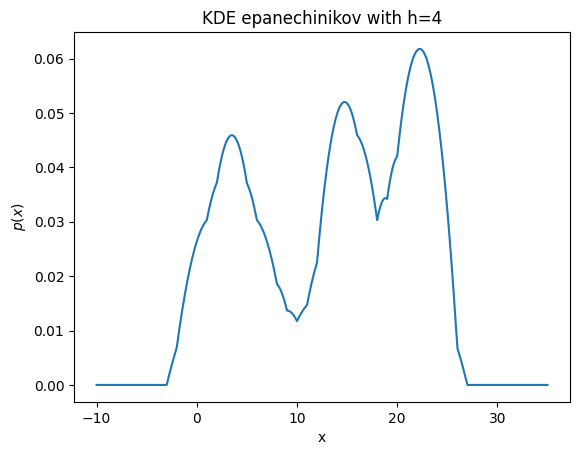

In [13]:
plt.plot(xlin_ex2, kde_epanechinikov)
plt.xlabel("x")
plt.ylabel(r"$p(x)$")
plt.title("KDE epanechinikov with h=4")

In [14]:
kde_epanechinikov_skl = np.exp(KernelDensity(kernel="epanechnikov", bandwidth=bw_ex3).fit(ex1_data.reshape(-1, 1)).score_samples(xlin_ex2.reshape(-1, 1)))

Text(0.5, 1.0, 'KDE epanechinikov with h=4, using sklearn')

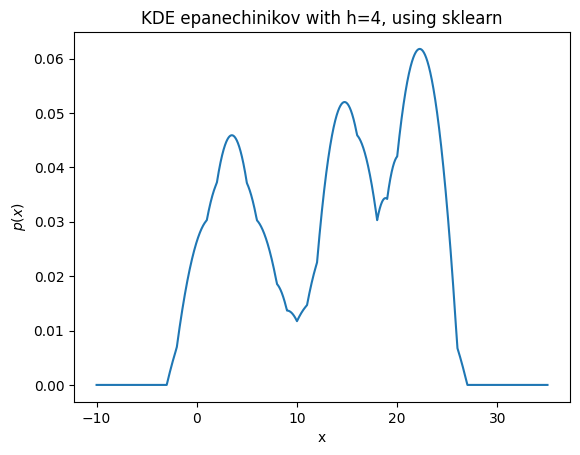

In [15]:
plt.plot(xlin_ex2, kde_epanechinikov_skl)
plt.xlabel("x")
plt.ylabel(r"$p(x)$")
plt.title("KDE epanechinikov with h=4, using sklearn")